In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import KeyedVectors
import gensim.downloader as api
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from transformers import DistilBertTokenizer, DistilBertModel
import torch
from sklearn.cluster import KMeans
from tqdm import tqdm
from kneed import KneeLocator
import matplotlib.cm as cm

In [76]:
full_words = [
    # Question Words
    "who", "what", "where", "when", "why", "how", 
    "which", "whom", "whose", "whatever", "whenever", "wherever", 
    "howsoever", "whosoever",

    # General Words
    "apple", "bank", "spring", "light", "fair", 
    "bat", "rock", "seal", "match", "key", 
    "book", "date", "plant", "row", "jam",

    # Exact Names
    "Einstein", "London", "Amazon", "Tesla", 
    "Mount Everest", "Python", "Harvard", "Google", 
    "Elon Musk", "Shakespeare", "Himalayas", "Coca-Cola", 
    "Eiffel Tower"
]


In [77]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')
pca = PCA(n_components=2)

def embed_word(word):
    inputs = tokenizer(word, return_tensors='pt')
    outputs = model(**inputs)
    # Take the [CLS] token's hidden state as the word embedding
    return outputs.last_hidden_state[:, 0, :].detach().numpy()

In [81]:
embedded_words = np.array([np.squeeze(embed_word(word)) for word in tqdm(full_words)])

100%|██████████| 42/42 [00:01<00:00, 34.18it/s]


In [79]:
words_2d = pca.fit_transform(embedded_words)

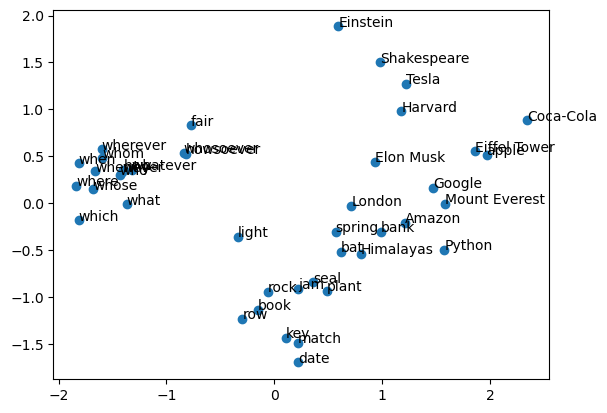

In [71]:
plt.scatter(words_2d[:, 0], words_2d[:, 1])
for i, word in enumerate(full_words):
    plt.text(words_2d[i, 0], words_2d[i, 1], word)

In [83]:
# Function to calculate WCSS
def calculate_wcss(X, max_clusters):
    wcss = []
    for i in range(1, max_clusters):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    return wcss

# Calculate WCSS for different values of k
wcss = calculate_wcss(words_2d, 20)

# Use KneeLocator to find the elbow point
kneedle = KneeLocator(range(1, 20), wcss, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

# Kmeans with the optimal number of clusters
kmeans_actual = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_actual.fit(words_2d)

# Colormap for clustering
cmap = cm.get_cmap('viridis', optimal_k)

f, ax = plt.subplots(2, 1, figsize=(6, 8))
# Plot the Elbow Method graph
ax[0].plot(range(1, 20), wcss, marker='o')
ax[0].vlines(optimal_k, ax[0].get_ylim()[0], ax[0].get_ylim()[1], linestyles='dashed')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('WCSS')
ax[1].scatter(words_2d[:, 0], words_2d[:, 1], c=kmeans_actual.labels_, cmap=cmap)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=10) for i in range(optimal_k)]
labels = [f'Cluster {cluster}' for cluster in range(optimal_k)]
ax[1].legend(handles, labels, title='Cluster')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [84]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')

In [85]:
kmeans.fit(words_2d)

AttributeError: 'NoneType' object has no attribute 'split'

In [89]:
np.isnan(words_2d).any()

False

In [90]:
np.isinf(words_2d).any()

False

In [91]:
len(words_2d.shape) == 2

True